<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/Gr%C3%A1fica_de_crecimiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X0 = 0.0002
λ = 0.3164 por día


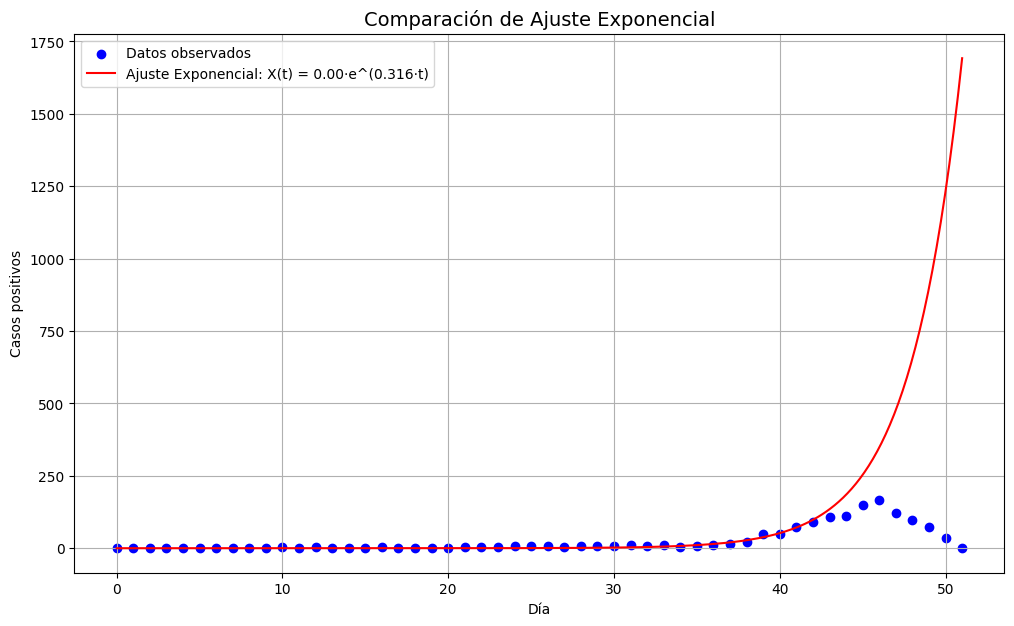

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos
casos_reales = [
    1,1,1,2,1,1,1,2,2,
    2,3,2,3,2,2,2,3,2,2,
    2,2,3,4,5,6,6,6,5,
    6,6,8,11,8,11,5,8,12,
    15,22,48,50,73,92,108,113,149,
    168,123,97,75,34,0
]
x = np.arange(len(casos_reales))
y = np.array(casos_reales)

mask = (x >= 30) & (x <= 40)
x_fit = x[mask]
y_fit = y[mask]

# Modelo exponencial
def modelo_exp(t, X0, lam):
    return X0 * np.exp(lam * t)

# Ajuste con curve_fit
params, _ = curve_fit(modelo_exp, x_fit, y_fit, p0=(1, 0.2), maxfev=10000)
X0, lam = params

print(f"X0 = {X0:.4f}")
print(f"λ = {lam:.4f} por día")

# Gráfica
x_smooth = np.linspace(0, len(x)-1, 200)
y_exp = modelo_exp(x_smooth, X0, lam)

plt.figure(figsize=(12,7))

# Datos observados
plt.scatter(x, y, color="blue", label="Datos observados")

# Ajuste exponencial
plt.plot(x_smooth, y_exp, color="red",
         label=f"Ajuste Exponencial: X(t) = {X0:.2f}·e^({lam:.3f}·t)")

# Títulos
plt.title("Comparación de Ajuste Exponencial", fontsize=14)
plt.xlabel("Día")
plt.ylabel("Casos positivos")
plt.legend()
plt.grid(True)
plt.show()
